## Load Data

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston

In [2]:
# observing boston dataset
load_boston()

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dataset = pd.DataFrame(load_boston().data)
dataset.columns = load_boston().feature_names
dataset.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
41,0.12744,0.0,6.91,0.0,0.4480,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84
109,0.26363,0.0,8.56,0.0,0.5200,6.229,91.2,2.5451,5.0,384.0,20.9,391.23,15.55
279,0.21038,20.0,3.33,0.0,0.4429,6.812,32.2,4.1007,5.0,216.0,14.9,396.90,4.85
341,0.01301,35.0,1.52,0.0,0.4420,7.241,49.3,7.0379,1.0,284.0,15.5,394.74,5.49
478,10.23300,0.0,18.10,0.0,0.6140,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03


In [4]:
dataset['PRICE'] = load_boston().target

In [5]:
dataset.sample(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
165,2.92400,0.0,19.58,0.0,0.605,6.101,93.0,2.2834,5.0,403.0,14.7,240.16,9.81,25.0
233,0.33147,0.0,6.20,0.0,0.507,8.247,70.4,3.6519,8.0,307.0,17.4,378.95,3.95,48.3
40,0.03359,75.0,2.95,0.0,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,34.9
250,0.14030,22.0,5.86,0.0,0.431,6.487,13.0,7.3967,7.0,330.0,19.1,396.28,5.90,24.4
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,188.0,19.1,359.29,27.26,15.7


In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)

## Ridge Regression
**The main aim of using Ridge regression is to reduce overfitting issue. Ridge regression reduces variance & we know, high variance results overfitting issue.**
$$ Cost Function = \sum (y_{i} - \bar y)^2 + λ \sum b_{i}^2 $$
where, <br>$ \bar y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{n}X_{n} $
<br>$ b = b_{1}, b_{2}, ..., b_{n} $
<br>$ 0 < λ < 1 $

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge_regressor = Ridge()

parameters_ridge = {'alpha' : [.001, .01, .1, 1, 10, 100]}

grid_search_ridge = GridSearchCV(estimator = ridge_regressor, param_grid = parameters_ridge, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_ridge.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [9]:
print(f'{grid_search_ridge.best_score_}\n')
print(f'{grid_search_ridge.best_params_}\n')
print(f'{grid_search_ridge.best_estimator_}')

-29.905701947540372

{'alpha': 100}

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)


In [10]:
ridge_regressor = Ridge(alpha = 100)

ridge_regressor.fit(X_train, y_train)

y_pred_ridge = ridge_regressor.predict(X_test)

In [11]:
pd.DataFrame(list(zip(y_test, y_pred_ridge)), columns = ['y_true', 'y_pred_ridge']).sample(5)

,y_true,y_pred_ridge
61,21.0,22.108736
65,29.8,32.345920
11,17.2,13.723032
78,22.6,27.156916
27,19.4,22.325796


## Lasso Regression

$$ Cost Function = \sum (y_{i} - \bar y)^2 + λ \sum |b_{i}| $$
where, <br>$ \bar y = b_{0} + b_{1}X_{1} + b_{2}X_{2} + ... + b_{n}X_{n} $
<br>$ b = b_{1}, b_{2}, ..., b_{n} $
<br>$ 0 < λ < 1 $

In [12]:
from sklearn.linear_model import Lasso

lasso_regressor = Lasso()

parameters_lasso = {'alpha' : [.001, .01, .1, 1, 10, 100]}

grid_search_lasso = GridSearchCV(estimator = lasso_regressor, param_grid = parameters_lasso, cv = 5, scoring = 'neg_mean_squared_error')
grid_search_lasso.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [13]:
print(f'{grid_search_lasso.best_score_}\n')
print(f'{grid_search_lasso.best_params_}\n')
print(f'{grid_search_lasso.best_estimator_}')

-34.83043231820268

{'alpha': 0.1}

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [14]:
lasso_regressor = Ridge(alpha = .1)

lasso_regressor.fit(X_train, y_train)

y_pred_lasso = lasso_regressor.predict(X_test)

In [16]:
pd.DataFrame(list(zip(y_test, y_pred_lasso)), columns = ['y_true', 'y_pred_lasso']).sample(5)

,y_true,y_pred_lasso
83,44.8,37.779264
23,29.1,30.325813
90,18.9,15.836034
44,16.5,23.060869
24,19.3,22.396767


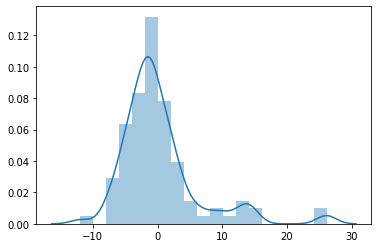

In [25]:
import seaborn as sns

sns.distplot(y_test - y_pred_ridge)

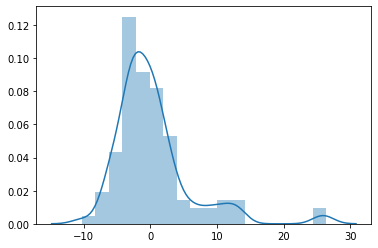

In [26]:
sns.distplot(y_test - y_pred_lasso)

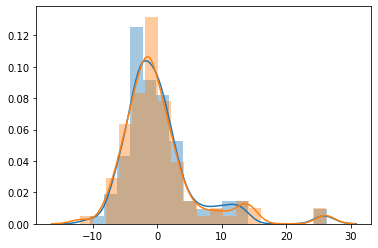

In [27]:
sns.distplot(y_test - y_pred_lasso)
sns.distplot(y_test - y_pred_ridge)